In [28]:
import pandas as pd
import numpy as np


from analyze_src.data_inspection import DataInspector, DataTypesInspectionStrategy, SummaryStatisticsInspectionStrategy
from analyze_src.missing_values_analysis import SimpleMissingValuesAnalysis
from analyze_src.univariate_analysis import UnivariateAnalyzer, NumericalUnivariateAnalysis, CategoricalUnivariateAnalysis
from analyze_src.bivariate_analysis import BivariateAnalyzer, NumericalBivariateAnalysis, CategoricalVsNumericalAnalysis
from analyze_src.multivariate_analysis import MultivariateAnalysis

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [29]:
# Step 1: Basic Data Inspection
# ------------------------------------
# Initialize the Data Inspector with a strategy for Data Types Inspectio

data_inspector = DataInspector(DataTypesInspectionStrategy())
data_inspector.execute_inspection(df)

2025-05-09 14:39:20,874 - INFO - Inspecting data types and non-null counts...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

{'data_types': Order                int64
 PID                  int64
 MS SubClass          int64
 MS Zoning           object
 Lot Frontage       float64
 Lot Area             int64
 Street              object
 Alley               object
 Lot Shape           object
 Land Contour        object
 Utilities           object
 Lot Config          object
 Land Slope          object
 Neighborhood        object
 Condition 1         object
 Condition 2         object
 Bldg Type           object
 House Style         object
 Overall Qual         int64
 Overall Cond         int64
 Year Built           int64
 Year Remod/Add       int64
 Roof Style          object
 Roof Matl           object
 Exterior 1st        object
 Exterior 2nd        object
 Mas Vnr Type        object
 Mas Vnr Area       float64
 Exter Qual          object
 Exter Cond          object
 Foundation          object
 Bsmt Qual           object
 Bsmt Cond           object
 Bsmt Exposure       object
 BsmtFin Type 1      object
 BsmtF

In [30]:
# Switch to Summary Statistics Inspection Strategy
data_inspector.set_strategy(SummaryStatisticsInspectionStrategy())
data_inspector.execute_inspection(df)

2025-05-09 14:42:24,739 - INFO - Generating summary statistics...


{'numerical_summary':              Order           PID  MS SubClass MS Zoning  Lot Frontage  \
 count   2930.00000  2.930000e+03  2930.000000      2930   2440.000000   
 unique         NaN           NaN          NaN         7           NaN   
 top            NaN           NaN          NaN        RL           NaN   
 freq           NaN           NaN          NaN      2273           NaN   
 mean    1465.50000  7.144645e+08    57.387372       NaN     69.224590   
 std      845.96247  1.887308e+08    42.638025       NaN     23.365335   
 min        1.00000  5.263011e+08    20.000000       NaN     21.000000   
 25%      733.25000  5.284770e+08    20.000000       NaN     58.000000   
 50%     1465.50000  5.354536e+08    50.000000       NaN     68.000000   
 75%     2197.75000  9.071811e+08    70.000000       NaN     80.000000   
 max     2930.00000  1.007100e+09   190.000000       NaN    313.000000   
 
              Lot Area Street Alley Lot Shape Land Contour Utilities  \
 count     2930.0


Missing Values Count by Column:
Lot Frontage       490
Alley             2732
Mas Vnr Type      1775
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64

Visualizing Missing Values...


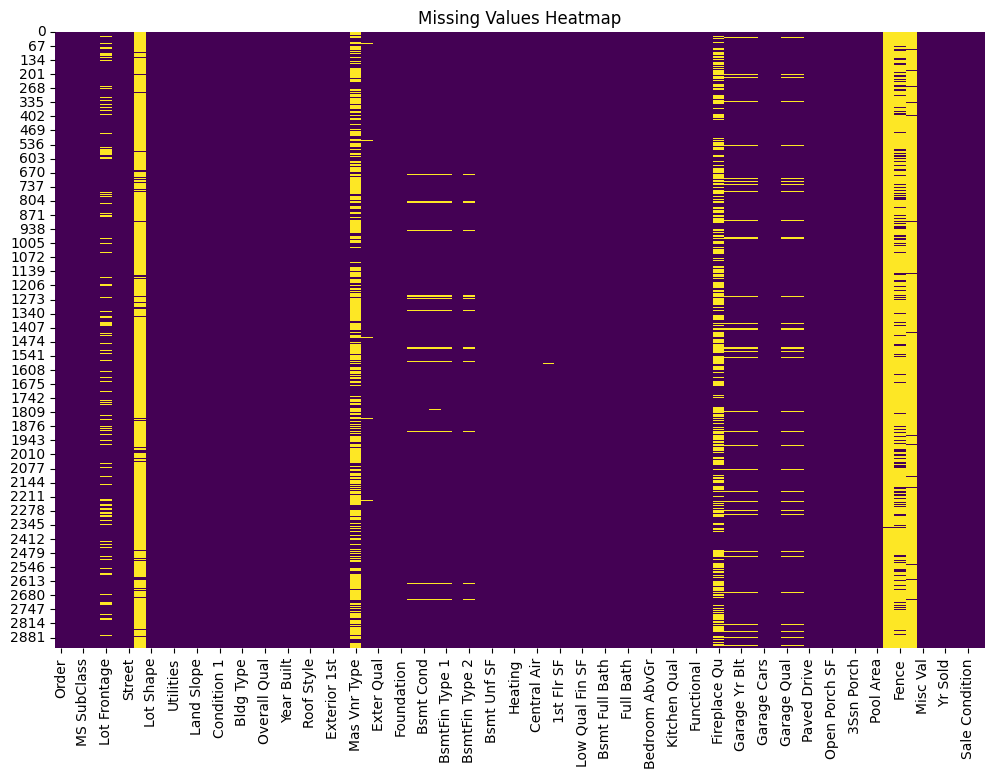

In [32]:
# Step 2: Missing Values Analysis
# ------------------------------------
# Perform a simple missing values analysis
missing_values_analyzer = SimpleMissingValuesAnalysis()
missing_values_analyzer.analyze(df)

# Missing Values Heatmap Insights

#### **1. Colors Represent Missingness:**
- **Yellow**: Represents missing values. The more yellow you see in a column, the more missing data is present in that particular feature.
- **Purple (or dark color)**: Represents non-missing values. Columns that are mostly purple indicate that most of the data is present for that feature.

#### **2. Identifying Columns with Missing Data:**
- Look for columns with significant amounts of yellow. These columns have a higher proportion of missing data.
  - For instance, in your heatmap, columns like `Lot Frontage`, `Mas Vnr Type`, `Mas Vnr Area`, `Garage Yr Blt`, and `Pool Area` have substantial yellow, indicating that these features have missing values.

#### **3. Understanding the Distribution of Missing Data:**
- **Randomly Distributed**: If the yellow marks are scattered without any noticeable pattern, it suggests that the missing data might be randomly distributed.
- **Structured Missingness**: If the yellow is clustered in certain rows or columns, it might indicate a non-random pattern of missingness. For example, entire rows or columns missing could suggest a data collection issue or that these features are not applicable in certain cases.

#### **4. Assessing the Severity:**
- Columns with more yellow indicate a higher proportion of missing values, which might pose a problem for model building. This could lead to biased or inaccurate models if not handled properly.
  - In your heatmap, some columns have little to no missing values, while others have substantial missingness. Decisions will need to be made on whether to impute, drop, or handle these features differently.